# Test Bundle Model
Some quick tests with our bundle heating model

In [125]:
import sys
from imp import reload

import numpy as np
import matplotlib.pyplot as plt
import seaborn
import astropy.units as u
from astropy.coordinates import SkyCoord
import sunpy.map
from sunpy.sun import constants
import synthesizAR
from synthesizAR.util import heeq_to_hcc_coord

sys.path.append('../scripts/')
import bundle_heating_model
reload(bundle_heating_model)

%matplotlib inline

In [2]:
noaa1158 = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/base_noaa1158/')

In [174]:
heating_options = {
    'stress': 5e-3,
    'event_duration': 200 * u.s,
    'storm_duration': 500. * u.s
}
num_bins = 50
total_time = 3e4*u.s

In [175]:
bundle_model = bundle_heating_model.BundleHeatingModel(heating_options, noaa1158, num_bins=num_bins,)

In [ ]:
bundle_model.constrain_number_storms(total_time,)

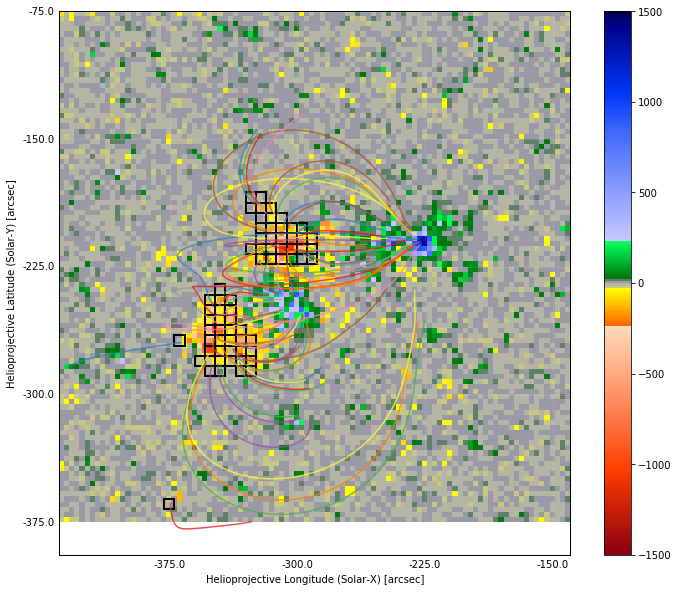

In [140]:
fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection=noaa1158.magnetogram)
im = noaa1158.magnetogram.plot(title=False,cmap='hmimag',axes=ax,vmin=-1.5e3,vmax=1.5e3)
colors = seaborn.color_palette('Set1', len(bundles))
for i,b in enumerate(bundles):
    for l in b[:10]:
        loop_hpc = (heeq_to_hcc_coord(*l.coordinates.T, noaa1158.magnetogram.observer_coordinate)
                    .transform_to(noaa1158.magnetogram.coordinate_frame))
        ax.plot_coord(loop_hpc, color=colors[i],alpha=0.75)
    noaa1158.magnetogram.draw_rectangle(b.corners[0],
                                        b.corners[1].Tx - b.corners[0].Tx,
                                        b.corners[1].Ty - b.corners[0].Ty,
                                        axes=ax,color='k',lw=2)
fig.colorbar(im,ax=ax)

In [180]:
rates = []
for l in noaa1158.loops[::10]:
    rates += bundle_model.calculate_event_properties(l)['magnitude'].tolist()

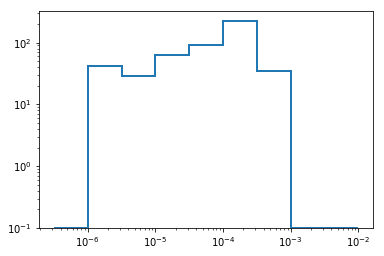

In [181]:
plt.hist(rates, histtype='step', lw=2, log=True, bins=np.logspace(-6.5,-2,10))
plt.xscale('log')